In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [14]:
series = 85
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = "audio"
series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, model_name=model_name
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [15]:
results.columns

Index(['experiment_id', 'client_to_model_avg', 'client_to_model_p99',
       'client_to_model_p95', 'client_to_model_p50', 'client_to_model_var',
       'client_to_model_max', 'client_to_model_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p95', 'model_latencies_p50',
       'model_latencies_var', 'model_latencies_max', 'model_latencies_min',
       'model_to_client_avg', 'model_to_client_p99', 'model_to_client_p95',
       'model_to_client_p50', 'model_to_client_var', 'model_to_client_max',
       'model_to_client_min', 'e2e_latencies_avg', 'e2e_latencies_p99',
       'e2e_latencies_p95', 'e2e_latencies_p50', 'e2e_latencies_var',
       'e2e_latencies_max', 'e2e_latencies_min', 'start_time', 'end_time',
       'duration', 'timeout_count', 'cpu_usage_count_avg',
       'cpu_usage_count_p99', 'cpu_usage_count_p95', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p

In [16]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 1.yaml
{   'benchmark_duration': 1,
    'cpu_request': ['1', '2', '4', '8'],
    'data_type': 'audio',
    'max_batch_size': ['1', '2', '8', '32', '64'],
    'max_batch_time': ['1'],
    'memory_request': ['10Gi'],
    'mode': 'step',
    'model_variants': [   'facebook-s2t-small-librispeech-asr',
                          'facebook-s2t-medium-librispeech-asr',
                          'facebook-s2t-large-librispeech-asr',
                          'facebook-wav2vec2-base-960h',
                          'facebook-wav2vec2-large-960h'],
    'node_name': 'audio',
    'num_interop_threads': ['1'],
    'num_threads': ['1'],
    'pipeline_name': 'audio-qa',
    'repetition': 1,
    'replicas': [1],
    'series': 85,
    'series_meta': 'Final profile on: Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 1,
    'use_threading': 'True',
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 10, 20]},
    'workload_type': 'static'}
File name: 2.yaml
{   'benchmar

In [17]:
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine,mode,data_type,benchmark_duration
0,1,audio-qa,audio,facebook-s2t-small-librispeech-asr,1,10Gi,1,1,1,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
1,2,audio-qa,audio,facebook-s2t-small-librispeech-asr,1,10Gi,1,1,10,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
2,3,audio-qa,audio,facebook-s2t-small-librispeech-asr,1,10Gi,1,1,20,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
3,4,audio-qa,audio,facebook-s2t-small-librispeech-asr,2,10Gi,1,1,1,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
4,5,audio-qa,audio,facebook-s2t-small-librispeech-asr,2,10Gi,1,1,10,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,audio-qa,audio,facebook-wav2vec2-large-960h,4,10Gi,64,1,10,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
296,297,audio-qa,audio,facebook-wav2vec2-large-960h,4,10Gi,64,1,20,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
297,298,audio-qa,audio,facebook-wav2vec2-large-960h,8,10Gi,64,1,1,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1
298,299,audio-qa,audio,facebook-wav2vec2-large-960h,8,10Gi,64,1,10,60,85,Final profile on: Intel(R) Xeon(R) Gold 6126 C...,1,False,step,audio,1


,model_variant,max_batch_size,cpu_request,load,cpu_usage_count_avg,model_latencies_p99,throughput_max,expected_max_throughput
0,facebook-s2t-small-librispeech-asr,1,1,10,81.783846,0.372937,2.994012,2.681419
1,facebook-s2t-small-librispeech-asr,1,2,10,108.369818,0.269170,4.240876,3.715124
2,facebook-s2t-small-librispeech-asr,1,4,10,152.993961,0.206800,5.129440,4.835587
3,facebook-s2t-small-librispeech-asr,1,8,10,227.893831,0.188498,5.979798,5.305082
4,facebook-s2t-medium-librispeech-asr,1,1,10,218.085001,0.788252,1.338945,1.268630
5,facebook-s2t-medium-librispeech-asr,1,2,10,238.762542,0.543529,2.274929,1.839829
6,facebook-s2t-medium-librispeech-asr,1,4,10,281.114254,0.312949,3.490794,3.195412
7,facebook-s2t-medium-librispeech-asr,1,8,10,445.693296,0.251303,4.382224,3.979261
8,facebook-s2t-large-librispeech-asr,1,1,10,669.971409,2.309723,0.445948,0.432952
9,facebook-s2t-large-librispeech-asr,1,2,10,792.384675,1.481949,0.753444,0.674787


Text(0, 0.5, 'Throughput (RPS)')

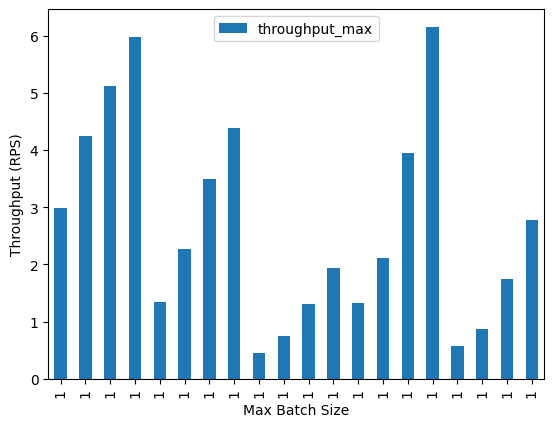

In [19]:
experiment_ids = key_config_df[
    (key_config_df["max_batch_size"] == 1)
    # & (key_config_df["model_variant"] == "facebook-s2t-medium-librispeech-asr")
    & (key_config_df["load"] == 10)
]["experiment_id"].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request", "load"]
results_columns = ["cpu_usage_count_avg", "model_latencies_p99", "throughput_max"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
output["expected_max_throughput"] = (
    1 / output["model_latencies_p99"] * output["max_batch_size"]
)
# output.sort_values(by='throughput')
display(output)
ax = output.plot.bar(x="max_batch_size", y=["throughput_max"])
ax.set_xlabel("Max Batch Size")
ax.set_ylabel("Throughput (RPS)")